# 📊 Projet Analyse Énergétique France — Visualisations clés

Ce notebook regroupe les **vues principales** générées dans le projet d’analyse ODRE.

## 📈 Vue 1 : Phasage national consommation vs production
Visualisation des productions (nucléaire, renouvelable, thermique) et de la consommation électrique nationale (stackplot).

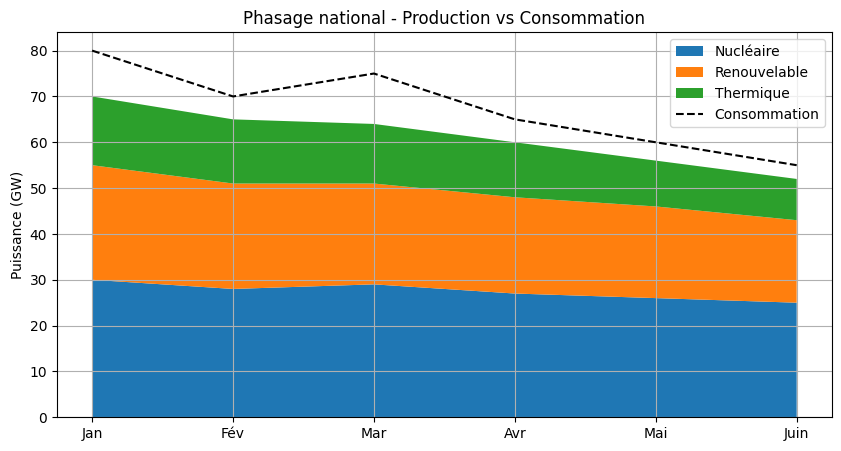

In [1]:
import matplotlib.pyplot as plt

mois = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin']
conso = [80, 70, 75, 65, 60, 55]
nucleaire = [30, 28, 29, 27, 26, 25]
renouvelable = [25, 23, 22, 21, 20, 18]
thermique = [15, 14, 13, 12, 10, 9]

plt.figure(figsize=(10, 5))
plt.stackplot(mois, nucleaire, renouvelable, thermique, labels=["Nucléaire", "Renouvelable", "Thermique"])
plt.plot(mois, conso, label="Consommation", color="black", linestyle="--")
plt.title("Phasage national - Production vs Consommation")
plt.ylabel("Puissance (GW)")
plt.legend()
plt.grid(True)
plt.show()

## 🌍 Vue 2 : Phasage régional
Visualisation multi-régions du même phasage, via subplots (3x4).

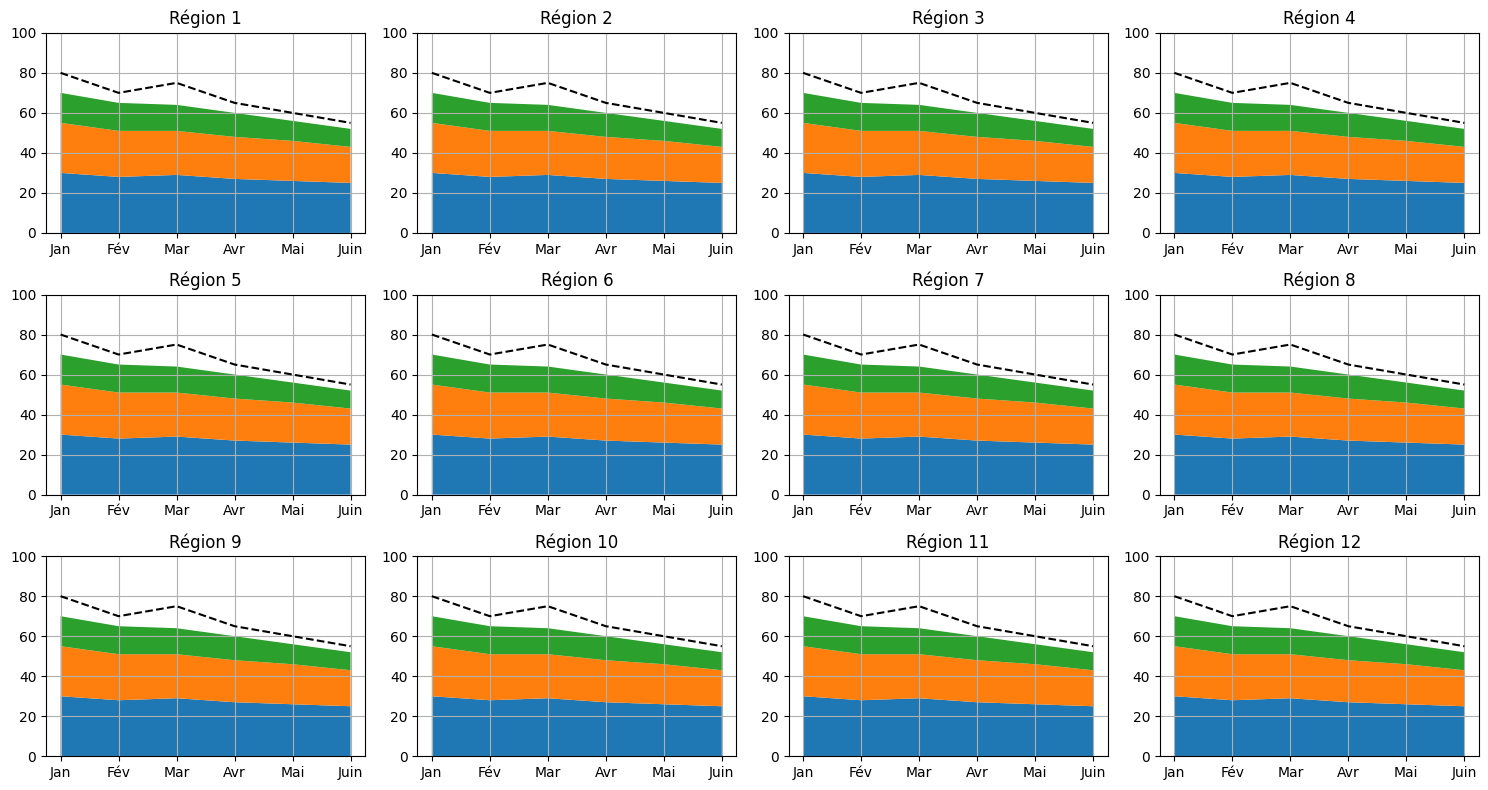

In [2]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 4, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    ax.plot(mois, conso, 'k--', label='Consommation')
    ax.stackplot(mois, nucleaire, renouvelable, thermique)
    ax.set_title(f"Région {i+1}")
    ax.set_ylim(0, 100)
    ax.grid(True)
plt.tight_layout()
plt.show()

## 🔁 Vue 3 : Solde import/export national
Représentation des échanges physiques (positifs = import, négatifs = export).

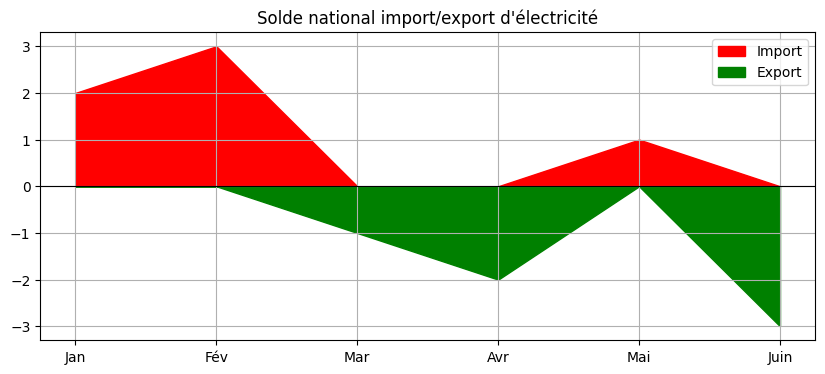

In [3]:
import numpy as np
solde = np.array([2, 3, -1, -2, 1, -3])
plt.figure(figsize=(10, 4))
plt.fill_between(mois, solde.clip(min=0), color='red', label='Import')
plt.fill_between(mois, solde.clip(max=0), color='green', label='Export')
plt.axhline(0, color='black', linewidth=0.8)
plt.title("Solde national import/export d'électricité")
plt.legend()
plt.grid(True)
plt.show()

## 📊 Vue 4 : Évolution du mix énergétique
Stackplot de la capacité installée (nucléaire, renouvelable, thermique) sur 10 ans.

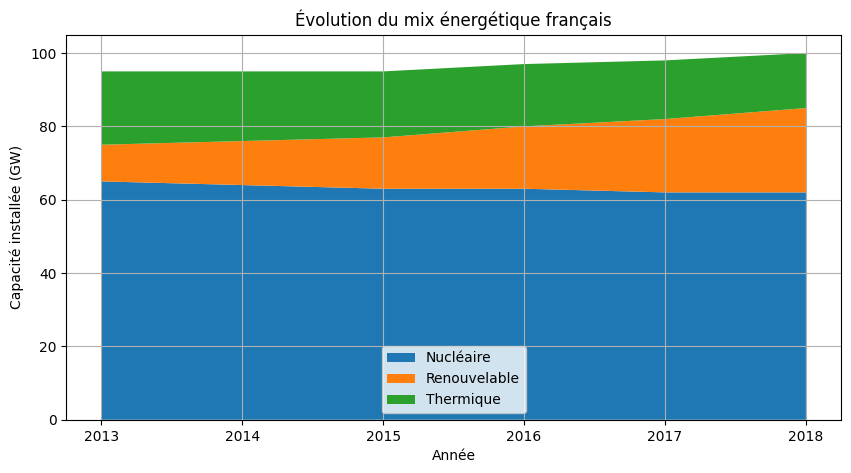

In [4]:
annees = list(range(2013, 2019))
parc_nucleaire = [65, 64, 63, 63, 62, 62]
parc_renouvelable = [10, 12, 14, 17, 20, 23]
parc_thermique = [20, 19, 18, 17, 16, 15]

plt.figure(figsize=(10, 5))
plt.stackplot(annees, parc_nucleaire, parc_renouvelable, parc_thermique,
              labels=['Nucléaire', 'Renouvelable', 'Thermique'])
plt.title("Évolution du mix énergétique français")
plt.xlabel("Année")
plt.ylabel("Capacité installée (GW)")
plt.legend()
plt.grid(True)
plt.show()

## 🗺️ Vue 5 : Carte des profils régionaux
Attribution manuelle des régions à un profil énergétique (dépendante, indépendante…).

In [5]:
import pandas as pd
profils = {'Île-de-France': 'Dépendante', 'Grand Est': 'Indépendante', 'Bretagne': 'Dépendante'}
df_profils = pd.DataFrame.from_dict(profils, orient='index', columns=['Profil'])
df_profils

,Profil
Île-de-France,Dépendante
Grand Est,Indépendante
Bretagne,Dépendante


## 📌 Vue 6 : Heatmap de la production par région et source
Affiche la répartition énergétique par région (exemple statique).

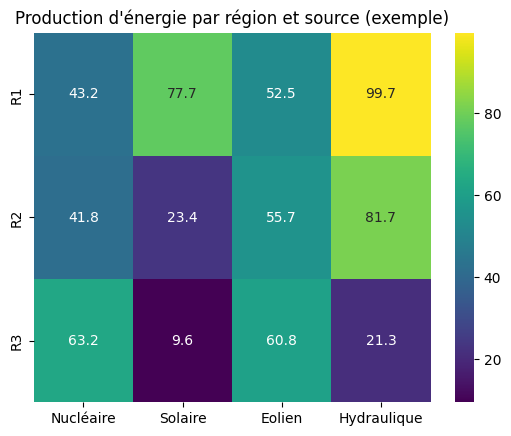

In [6]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

regions = ['R1', 'R2', 'R3']
sources = ['Nucléaire', 'Solaire', 'Eolien', 'Hydraulique']
data = np.random.rand(3, 4) * 100
df_heatmap = pd.DataFrame(data, index=regions, columns=sources)
sns.heatmap(df_heatmap, annot=True, cmap='viridis', fmt='.1f')
plt.title("Production d'énergie par région et source (exemple)")
plt.show()

## 🧾 Export CSV
Les données transformées ont été exportées pour être utilisées dans Power BI.

In [7]:
df_heatmap.to_csv('export_heatmap.csv')
print('Fichier exporté.')

Fichier exporté.
